<table  align="left" width="100%"> <tr>
        <td  style="background-color:#ffffff;"><a href="https://qsoftware.lu.lv/index.php/qworld/" target="_blank"><img src="..\images\qworld.jpg" width="35%" align="left"></a></td>
        <td  align="right" style="background-color:#ffffff;vertical-align:bottom;horizontal-align:right">
            prepared by Özlem Salehi (<a href="http://qworld.lu.lv/index.php/qturkey/" target="_blank">QTurkey</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h1> <font color="blue"> Solutions for </font> Original QPA </h1>

<h3>Task 1</h3>
<a id="task1"></a>

Please, show that the problem can not be solved for these two gates and draw the circuit: 

<h3>Solution </h3>

{'11': 1000}


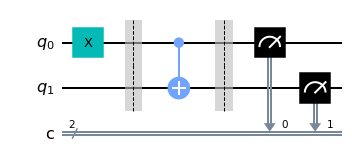

In [1]:
# import all necessary objects and methods for quantum circuits
from qiskit import *
from numpy import pi

# define a quantum register with a single qubit
q = QuantumRegister(2,"q")
# define a classical register with a single bit
c = ClassicalRegister(2,"c")
# define a quantum circuit
qc = QuantumCircuit(q,c)

qc.x(q[0])
qc.barrier()

qc.cx(q[0],q[1])
#qc.x(q[1])
qc.barrier()

qc.measure(q,c)
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=4096)
counts = job.result().get_counts(qc)   
print(counts)

qc.draw("mpl")

<h3>Task 2</h3>
<a id="task2"></a>

Please, implement the following iteration by using summation method: 

$QFT^{\dagger} P^{-}_0 QFT \ket{01}=?$

<h3>Solution </h3>

To find answer of this question, the equations given above can be used. For now, I'm beginning to find the $\ket{\psi_2}$ by using the equation (3) :
$\ket{\psi_2^-}
= P_0^-QFT\ket{01} 
= P_0^-QFT\ket{1} 
= \frac{1}{\sqrt{4}}\sum_{k=0}^{4-1} e^{i\frac{2\pi 1 k } {4}}\ket{(0{+}k)_{\mod(4)}} \\
= \frac{1}{2}\sum_{k=0}^{3} \ket{(0{+}k)_{\mod(4)}} 
= \frac{1}{2}(\ket{(0{+}0)_{\mod(4)}} +e^{i\frac{2\pi 1 k } {4}}\ket{(0{+}1)_{\mod(4)}} + e^{i\frac{2\pi 2 k } {4}}\ket{(0{+}2)_{\mod(4)}} + e^{i\frac{2\pi 3 k } {4}}\ket{(0{+}3)_{\mod(4)}}) \\
= \frac{1}{2}(\ket{0} + e^{i\frac{\pi k }{2}}\ket{1} + e^{i\pi k}\ket{2} + e^{i\frac{\pi 3 k }{2}}\ket{3} )$

$\ket{\psi_3^-}
= QFT^{\dagger} P^{-}_0 QFT \ket{00} 
= \frac{1}{2}(QFT^{\dagger}\ket{0} + e^{i\frac{\pi k }{2}} QFT^{\dagger}\ket{1} + e^{i\pi k}QFT^{\dagger}\ket{2} + e^{i\frac{\pi 3 k }{2}}QFT^{\dagger}\ket{3}) \\
= \frac{1}{2}(\frac{1}{2}\sum_{k=0}^{3} e^{-i\frac{2\pi 0 k }{4}}\ket{k}+\frac{1}{2}e^{i\frac{\pi k }{2}}\sum_{k=0}^{3} e^{-i\frac{2\pi 1 k }{4}}\ket{k}+\frac{1}{2}\sum_{k=0}^{3} e^{-i\frac{2\pi 2 k }{4}}\ket{k}+\frac{1}{2}\sum_{k=0}^{3} e^{-i\frac{2\pi 3 k }{4}}\ket{k}) \\
= \frac{1}{4}[\ket{0} +\ket{1} +\ket{2}+\ket{3}+e^{i\frac{\pi}{2}}\ket{0}+ \ket{1}+e^{-i\frac{\pi}{2}}\ket{2}+e^{-i\pi}\ket{3}+ e^{i\pi}\ket{0}+ \ket{1}+e^{-i\pi}\ket{2}+e^{-i\pi2}\ket{3}+ e^{i\frac{\pi 3}{2}}\ket{0}+ \ket{1}+e^{-i\frac{\pi 3}{2}}\ket{2}+e^{-i\pi3}\ket{3}] \\
= \frac{1}{4}[\ket{0} +\ket{1} +\ket{2} +\ket{3} + i\ket{0} +\ket{1} -i\ket{2} -\ket{3} -\ket{0} +\ket{1} -\ket{2} +\ket{3}    -i\ket{0} +\ket{1} +i\ket{2} -\ket{3}] \\ 
= \frac{1}{4}[4\ket{3}] = \ket{11}$

If you look at the equation (4), you will see the equality such below: 
$\ket{\psi_3^-} = e^{-i \frac{2\pi(d-j) m}{d}}\ket{(d-j)_{\mod(d)}} = e^{-i \frac{2\pi(4-1) 0}{4}}\ket{(4-1)_{\mod(4)}} = \ket{3} \equiv \ket{11}$

Namely, we can see that the results and formulas are consistent with each other

<h3>Task 3 (on paper)</h3>
<a id="task3"></a>

Please, implement the following iteration by using matrix method and compare with the result from the summation method: 

$QFT^{\dagger} P^{+}_2 QFT \ket{01}=?$

<h3>Solution </h3>

$QFT^{\dagger} P^{+}_2 QFT \ket{01}$

$=\frac{1}{2}\mymatrix{rrrr}{1 & 1 & 1 & 1\\ 
                   1 & -i & -1 & i \\ 
                   1 & -1 & 1 & -1 \\
                   1 & i & -1 & -i} \mymatrix{rrrr}{0 & 0 & 1 & 0\\ 
                   0 & 0 & 0 & 1 \\ 
                   1 & 0 & 0 & 0 \\
                   0 & 1 & 0 & 0} \frac{1}{2}\mymatrix{rrrr}{1 & 1 & 1 & 1\\ 
                   1 & i & -1 & -i \\ 
                   1 & -1 & 1 & -1 \\
                   1 & -i & -1 & i}\myvector{0 \\ 1 \\ 0 \\ 0} = \frac{1}{4}\mymatrix{rrrr}{1 & 1 & 1 & 1\\ 
                   1 & -i & -1 & i \\ 
                   1 & -1 & 1 & -1 \\
                   1 & i & -1 & -i} \mymatrix{rrrr}{0 & 0 & 1 & 0\\ 
                   0 & 0 & 0 & 1 \\ 
                   1 & 0 & 0 & 0 \\
                   0 & 1 & 0 & 0}\myvector{1 \\ i \\ -1 \\ -i}
= \frac{1}{4}\mymatrix{rrrr}{1 & 1 & 1 & 1\\ 
                   1 & -i & -1 & i \\ 
                   1 & -1 & 1 & -1 \\
                   1 & i & -1 & -i}\myvector{-1 \\ -i \\ 1 \\ i}=\frac{1}{4}\myvector{-1 -i +1 +i \\ -1 -1 -1 -1 \\-1 +i +1 -i  \\ -1 +1 -1 +1 } = -\myvector{0 \\ 1 \\ 0 \\ 0} =-\ket{01}$

<h3>Task 4 (on paper)</h3>
<a id="task4"></a>

Please, build up other three superposed states and get the statevector to convince yourself. 

<h3>Solution </h3>

In [2]:
# import all necessary objects and methods for quantum circuits
from qiskit import *
from numpy import pi

# define a quantum register with a single qubit
q = QuantumRegister(2,"q")
# define a classical register with a single bit
c = ClassicalRegister(2,"c")
# define a quantum circuit
qc = QuantumCircuit(q,c)

# apply the necessary gates to build up superposed states.
qc.h(q[0])
qc.h(q[1])
#qc.s(q[0])
#qc.z(q[1])
#qc.z(q[0])

state = execute(qc,Aer.get_backend('statevector_simulator'),shots=4096)  
print(state.result().get_statevector())

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


<h3>Task 5 (on paper)</h3>
<a id="task5"></a>

Please, build up other three superposed states and get the statevector to convince yourself. 

<h3>Solution </h3>

In [ ]:
# import all necessary objects and methods for quantum circuits
from qiskit import *
from numpy import pi

# define a quantum register with a single qubit
q = QuantumRegister(2,"q")
# define a classical register with a single bit
c = ClassicalRegister(2,"c")
# define a quantum circuit
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.h(q[1])
qc.s(q[0])
qc.z(q[1])
#qc.z(q[0])
qc.barrier()


#
#your code is here!
#

qc.barrier()

qc.cx(q[1],q[0])
qc.h(q[1])
qc.h(q[0])
qc.cx(q[1],q[0])
qc.h(q[1])
qc.h(q[0])
qc.cx(q[1],q[0])

qc.h(q[0])
qc.cx(q[1],q[0])
qc.t(q[0])
qc.cx(q[1],q[0])
qc.tdg(q[0])
qc.tdg(q[1])
qc.h(q[1])
qc.barrier()

qc.measure(q,c)
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=4096)
counts = job.result().get_counts(qc)   
print(counts)

qc.draw("mpl")

In [ ]:
#P0+


#P1+
qc.cx(q[0],q[1])
qc.x(q[0])

#P2+
qc.x(q[1])

#P3+
qc.cx(q[0],q[1])
qc.x(q[0])
qc.x(q[1])

#P3-
qc.x(q[0])
qc.x(q[1])

#P2-
qc.cx(q[0],q[1])
qc.x(q[1])

#P1-
qc.x(q[0])

#P0-
qc.cx(q[0],q[1])